# SiMFS-Tk Example: Diffusion paths

This example shows how to generate a diffusion trajectory using ``simfs_dif`` trough pysimfs.

### Components

- ``simfs_dif``

### Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

from pysimfs import *

All simfs components found in /opt/SiMFS-Tk/SiMFS-core/build/src/components/.


## Creating a diffusion path

In [2]:
with Simulation() as s:
    s.add(Diffusion(
        collision_output=os.devnull, 
        coordinate_output='coords.dat', 
        experiment_time=20e-3))
    log = s.run()
    res = s.get_results()

Started simulation with 1 component processes.
Simulation completed after 0.07 seconds.


### Inspecting the data

Pysimfs loads the generated data from the simulation files as ``numpy`` arrays with a preset data type.
Diffusion coordinates are a typed array of ``(x, y, z, t)`` tuples.

In [3]:
trajectory = res['coords.dat']
trajectory

array([(3.52717628e-07, 3.35886435e-07, -4.16216688e-07, 0.00000e+00),
       (3.46929075e-07, 3.35370948e-07, -4.16980640e-07, 1.00000e-07),
       (3.50521840e-07, 3.34157885e-07, -4.10832371e-07, 2.00000e-07),
       ...,
       (2.30681495e-07, 4.63863852e-07,  4.62946770e-07, 1.99997e-02),
       (2.28547950e-07, 4.59891267e-07,  4.59527154e-07, 1.99998e-02),
       (2.21343816e-07, 4.62034957e-07,  4.54267012e-07, 1.99999e-02)],
      dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('t', '<f8')])

Let's create a plot of the xy-coordinate trace. We scale the dimensions from m to nm and fit the plot to the default diffusion box of 2x2 µm.
You can see the fractal diffsion path and an indication of the circular diffusion boundary in the xy-plane.

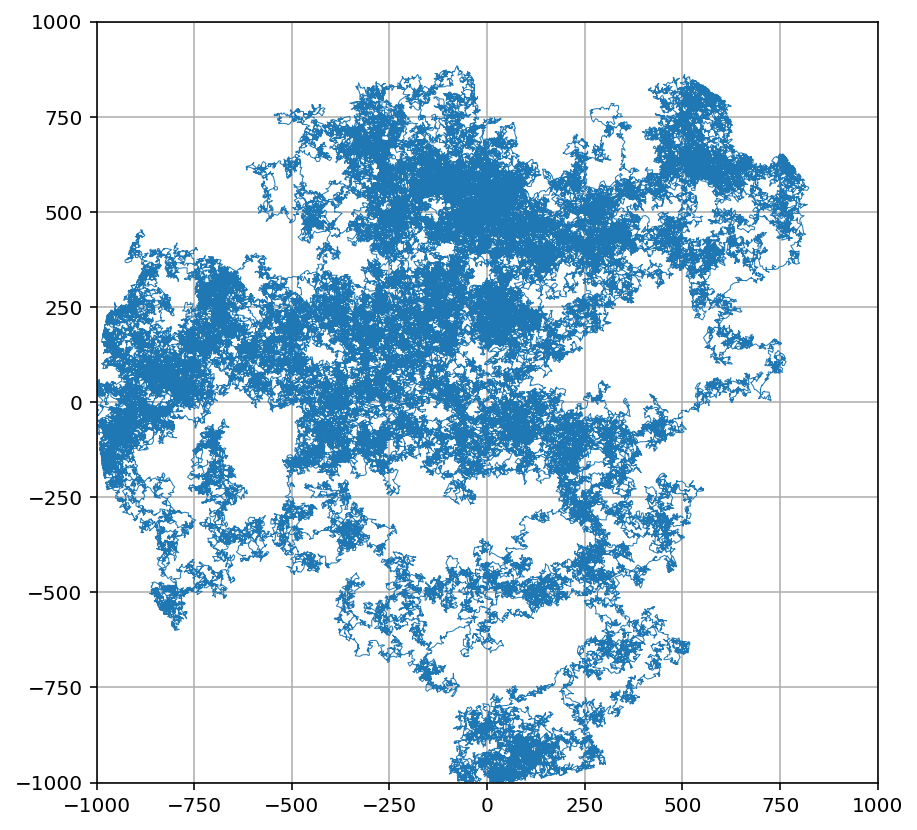

In [4]:
fig = plt.figure(figsize=(7,7))
plt.plot(trajectory['x']*1e+9, trajectory['y']*1e+9, lw=0.5)
plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)
plt.grid()

## Collisions

``simfs_dif`` can report on the collision events with the diffsion box. They are written the ``collision_output`` file.

In [5]:
with Simulation() as s:
    s.add(Diffusion(
        collision_output='collisions.dat', 
        coordinate_output='coords.dat',
        experiment_time=20e-3)
    )
    log = s.run()
    res = s.get_results()

Folder ./pysimfs_data exists.
Started simulation with 1 component processes.
Simulation completed after 0.09 seconds.


In [6]:
trajectory = res['coords.dat']
collisions = res['collisions.dat']

Collision events are just points in time. With some fancy indexing we into the coordinates, we can determine the corresponding collsion positions:

In [7]:
coll_ix = np.searchsorted(trajectory['t'], collisions)
coll_pos = trajectory[coll_ix]

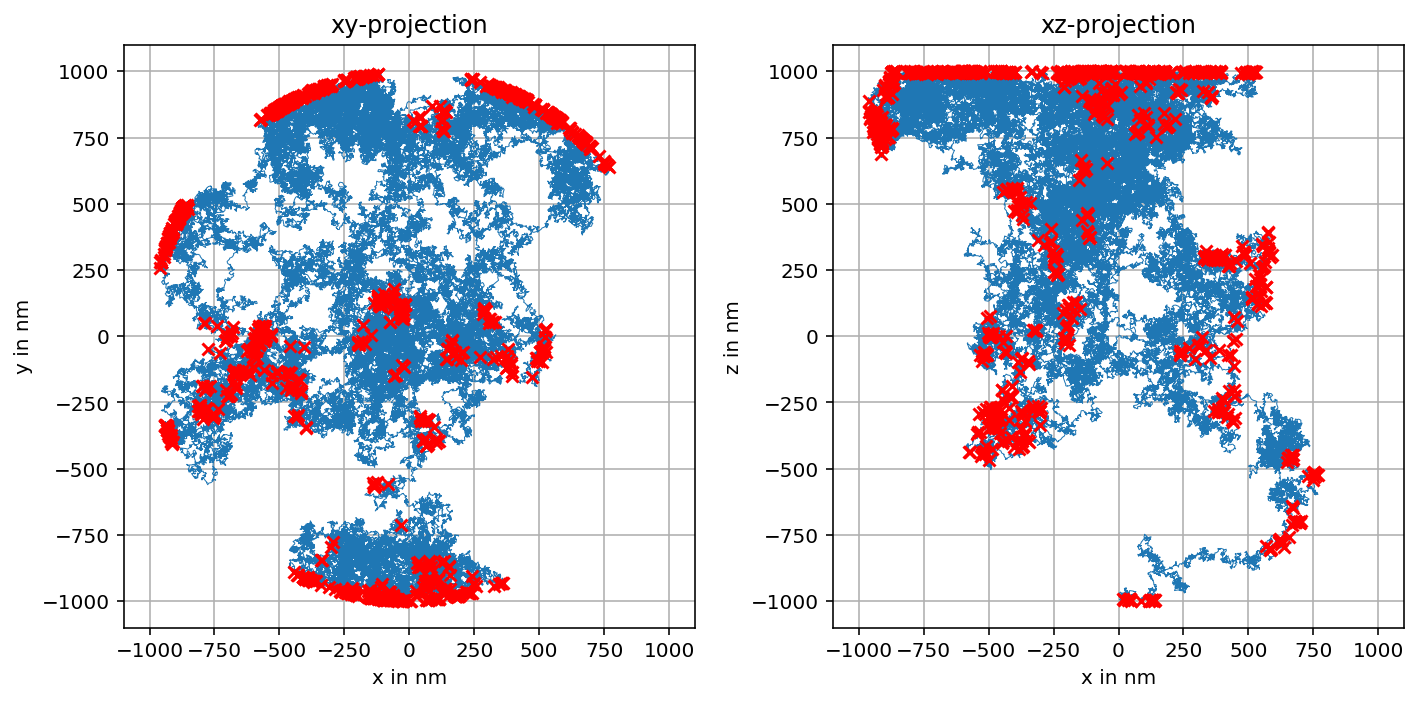

In [8]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2)

# xy-projection
ax1.plot(trajectory['x']*1e+9, trajectory['y']*1e+9, lw=0.5)
ax1.scatter(coll_pos['x']*1e+9, coll_pos['y']*1e+9, color='r', marker='x', zorder=10)
ax1.set_title('xy-projection')
ax1.set_ylabel('y in nm')

# xz-projection
ax2.plot(trajectory['x']*1e+9, trajectory['z']*1e+9, lw=0.5)
ax2.scatter(coll_pos['x']*1e+9, coll_pos['z']*1e+9, color='r', marker='x', zorder=10)
ax2.set_title('xz-projection')
ax2.set_ylabel('z in nm')

for ax in (ax1, ax2):
    ax.set_xlim(-1100, 1100)
    ax.set_ylim(-1100, 1100)
    ax.grid()
    ax.set_xlabel('x in nm')
  
plt.tight_layout()